In [ ]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score


In [21]:
#Set Random seed
# np.random.seed(500)

# Add the Data using pandas
df = pd.read_csv(r"F:\project\Text-Classification-master\Copy of corpus.csv",encoding='latin-1')



In [22]:
df.head()

,text,lable
0,Bowling is a target sport,1
1,Recreational activity,1
2,Bowling,1
3,Recreational activity in which a player rolls,0
4,Ball toward pins or another target,1


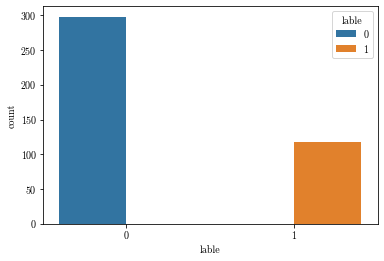

In [23]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

CSV_FILE = pd.read_csv('Copy of corpus.csv')
plt.rcParams['font.sans-serif']= "cmr10"
sns.countplot(x='lable',hue='lable',data=CSV_FILE)
plt.show()

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.text, df.lable, test_size=0.3)

In [25]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [26]:
print(vectorizer.vocabulary_)

{'calculations': 70, 'magnetic': 246, 'field': 174, 'evidence': 158, 'prototypes': 320, 'centre': 78, 'demonstrates': 122, 'thin': 412, 'piece': 297, 'of': 273, 'rectangular': 328, 'edgier': 143, 'knocked': 224, 'down': 137, 'on': 277, 'the': 406, 'first': 176, 'roll': 344, 'this': 414, 'practice': 309, 'was': 449, 'halted': 202, 'ten': 401, 'pin': 299, 'bowling': 56, 'gained': 191, 'only': 279, 'one': 278, 'advantage': 11, 'terrible': 403, 'lizard': 239, 'dinosaurs': 133, 'prototype': 319, 'robots': 343, 'saw': 352, 'widespread': 457, 'belong': 50, 'to': 419, 'barnstaple': 43, 'carving': 75, 'out': 283, 'far': 169, 'adjacent': 10, 'cables': 69, 'pilot': 298, 'gig': 195, 'club': 92, 'poverty': 308, 'fans': 168, 'produce': 313, 'swimming': 396, 'pool': 304, 'and': 24, 'rising': 342, 'crime': 114, 'ball': 41, 'toward': 422, 'pins': 300, 'or': 281, 'another': 27, 'target': 399, 'structure': 389, 'can': 72, 'dissipate': 135, 'coalition': 93, 'partners': 288, 'in': 214, 'old': 276, 'days': 

In [27]:
print(X_train)

  (0, 70)	1.0
  (1, 174)	0.7071067811865476
  (1, 246)	0.7071067811865476
  (2, 158)	1.0
  (3, 78)	0.6818744738848203
  (3, 320)	0.7314692077348846
  (4, 122)	1.0
  (5, 328)	0.5463598302360265
  (5, 273)	0.32322253589961986
  (5, 297)	0.5463598302360265
  (5, 412)	0.5463598302360265
  (6, 143)	1.0
  (7, 344)	0.4168823632553065
  (7, 176)	0.4168823632553065
  (7, 406)	0.2290096807464935
  (7, 277)	0.4472034423457742
  (7, 137)	0.4472034423457742
  (7, 224)	0.4472034423457742
  (8, 202)	0.5150719023745267
  (8, 449)	0.4367863513369254
  (8, 309)	0.5525345951284806
  (8, 414)	0.48849169886116617
  (9, 56)	0.5547759071544114
  (9, 299)	0.575496235977479
  (9, 401)	0.6008558689209532
  :	:
  (279, 194)	0.5773502691896258
  (279, 368)	0.5773502691896258
  (280, 255)	0.5995855161150406
  (280, 101)	0.5995855161150406
  (280, 31)	0.5300890658465995
  (281, 161)	0.7071067811865476
  (281, 372)	0.7071067811865476
  (282, 116)	0.6849312497499015
  (282, 15)	0.6055425899904614
  (282, 273)	0.40520

In [28]:
print(y_train)

108    0
76     0
347    0
184    0
233    0
      ..
313    1
60     0
138    0
26     0
205    1
Name: lable, Length: 290, dtype: int64


In [29]:
print(X_test)

  (0, 77)	1.0
  (1, 419)	0.42451628799393776
  (1, 156)	0.6402288345692687
  (1, 2)	0.6402288345692687
  (2, 181)	0.7071067811865476
  (2, 12)	0.7071067811865476
  (4, 469)	0.5859337097915406
  (4, 406)	0.3218761541509306
  (4, 273)	0.7436917567910303
  (5, 273)	0.39714268569575784
  (5, 32)	0.6713108964766001
  (5, 22)	0.6257949883709073
  (6, 356)	0.508394651465946
  (6, 344)	0.4739247145723231
  (6, 277)	0.508394651465946
  (6, 224)	0.508394651465946
  (7, 406)	0.29564575190996256
  (7, 261)	0.5773284235761043
  (7, 219)	0.5381846712368921
  (7, 60)	0.5381846712368921
  (8, 458)	1.0
  (9, 28)	1.0
  (10, 190)	1.0
  (11, 419)	0.6304970809137131
  (11, 33)	0.7761916200006842
  :	:
  (105, 446)	0.49689115363652836
  (105, 321)	0.5330315071192687
  (105, 27)	0.49689115363652836
  (107, 451)	0.7071067811865476
  (107, 410)	0.7071067811865476
  (108, 24)	1.0
  (109, 157)	1.0
  (110, 406)	0.34047047256267815
  (110, 83)	0.6648608340521145
  (110, 74)	0.6648608340521145
  (111, 394)	0.5
  (1

In [30]:
print(y_test)

180    0
225    0
380    1
40     0
332    1
      ..
364    1
154    0
75     0
156    0
142    0
Name: lable, Length: 125, dtype: int64


In [31]:
# NB Model

In [32]:
from sklearn.naive_bayes import MultinomialNB 
from sklearn import svm 
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report


In [33]:
# #fit the training dataset on the NB classifier
# model = MultinomialNB()
# model.fit(X_train, y_train)
# # predict the labels on validation dataset
# predictions = model.predict(X_test)
# # Use accuracy_score function to get the accuracy
# print('Naive Bayes Accuracy Score: ', accuracy_score(y_test.astype(str), predictions.astype(str)) * 100)

In [34]:
# SVM Model

In [35]:
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(X_train,y_train)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(X_test)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, y_test)*100)

SVM Accuracy Score ->  84.8


In [36]:
# Testing Some Text Data

In [37]:
# importing libraries
import speech_recognition as sr
import os
from pydub import AudioSegment
from pydub.silence import split_on_silence

In [38]:
import speech_recognition as sr

r = sr.Recognizer()

with sr.AudioFile('S1_P1_F.wav') as source:
    audio = r.listen(source)
    try:
       text = r.recognize_google(audio)
       print('working on...')
       print(text)
    except:
       print('Sorry...run again...')

working on...
bowling is the target sport and recreational activity in which a player rolls a ball toward pins or another targets the term bowling usually refers to ten pin bowling though in the United Kingdom and Commonwealth countries bowling could also refer to learn balls in pin bowling the girl is not over penis on a long playing service known as the lane a strike is achieved when all the pain the end of down on the first ball and a square is achieved if all the pins are not over on a second draught


ValueError: could not convert string to float: 'bowling is the target sport and recreational activity in which a player rolls a ball toward pins or another targets the term bowling usually refers to ten pin bowling though in the United Kingdom and Commonwealth countries bowling could also refer to learn balls in pin bowling the girl is not over penis on a long playing service known as the lane a strike is achieved when all the pain the end of down on the first ball and a square is achieved if all the pins are not over on a second draught'